# Product Growth Analytics at Seed Investing 
## Overview

Seed is a fictional fast-growing fintech company, growing to 100K users in the first 6 months since their app launched. While new users have been signing up, there has been low conversion to commit to their first investment deposit. This is the more important metric they track since it increases the assets under management (AUM). Seed charges 1% of the total AUM in each user account annually.

The app currently records a 22.68% conversion rate and a standard deviation of 0.42 for new users opening an account and submitting their first deposit into an investment account. They call this New User First Deposit Rate (NUFD Rate). The company believes that customers would be more inclined to open an investment account if they could interact with the app before providing personal details like SSN, contact information, and bank details.

After running user surveys with new and current users, the team found a strong interest in improving the user experience by adding more content and accessibility. The goal was to provide as much transparency about the investment app before users needed to commit any financial capital.


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
pd.set_option('display.max_rows', 10000)

## Functions

In [270]:
def find_z(x_bar, mu, stdev, sample_size):
    """Formula to calculate z_score.
       Using this z_score to reference z_table"""
    z_score = (x_bar - mu) / (stdev / (np.sqrt(sample_size)))
    
    return 'z_score: {}'.format(z_score.round(2))

In [267]:
def find_p_value(z_score, alpha):
    """ Enter p-value from z-score table"""
    result = (1- z_score) < alpha
    p_value = round((1- z_score),4)
    
    if result == True:
        return '''Results are Statistically Siginificant: p-value = {}'''.format(p_value)
                
    else:
        return '''Results are NOT Statistically Siginificant: p-value = {}'''.format(p_value)

## Experiment #1

In [259]:
conversions = pd.read_csv('investment_conversion.csv')

In [261]:
# Getting the original sample size conversion
experiment_results = pd.DataFrame(conversions.groupby('Group')['Outcome'].agg({'conversion_rate': 'mean', 
                                                     'stdev':'std', 
                                                     'converted':'sum', 
                                                     'sample_size':'count'})).reset_index() 
experiment_results

/Users/jason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """


,Group,conversion_rate,stdev,converted,sample_size
0,A,0.226802,0.418785,2212,9753
1,B,0.237801,0.425758,2388,10042


### Interpretting Results

In [262]:
# Convert to percentage
experiment_results['conversion_rate'] = (experiment_results['conversion_rate'] * 100).round(2)

In [263]:
experiment_results

,Group,conversion_rate,stdev,converted,sample_size
0,A,22.68,0.418785,2212,9753
1,B,23.78,0.425758,2388,10042


In [271]:
find_z(0.2378, 0.2268, 0.425758, 10042)

'z_score: 2.59'

In [272]:
find_p_value(0.9926, 0.05)

'Results are Statistically Siginificant: p-value = 0.0074'

## Experiment #2

In [273]:
deposits = pd.read_csv('first_deposit.csv')

In [274]:
# Getting the original sample size conversion
deposit_results = pd.DataFrame(deposits.groupby('Group')['Deposit'].agg({'avg_deposit': 'mean', 
                                                     'stdev':'std', 
                                                     'total_deposits':'sum', 
                                                     'sample_size':'count'})).reset_index() 
deposit_results

/Users/jason/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """


,Group,avg_deposit,stdev,total_deposits,sample_size
0,A,72.428013,376.708694,685676,9467
1,B,78.726013,387.030044,767185,9745


### Interpretting Results

In [279]:
find_z (78.73, 72.43, 387.03, 9745)

'z_score: 1.61'

In [280]:
find_p_value (0.9463, 0.05)

'Results are NOT Statistically Siginificant: p-value = 0.0537'

### Formating Permutation Test

In [281]:
# Calculate the deltas between the test and control group
b_delta = round(float(deposit_results[deposit_results['Group'] == 'B']['avg_deposit'])\
- float(deposit_results[deposit_results['Group'] == 'A']['avg_deposit']),2)

In [282]:
print("B delta: {}".format(b_delta))

B delta: 6.3


In [283]:
# Set sizes for the original samples
a_size = int(deposit_results[deposit_results['Group'] == 'A']['sample_size'])
b_size = int(deposit_results[deposit_results['Group'] == 'B']['sample_size'])

In [284]:
# Store only the outcomes from the dataset to keep the sample random
outcomes = list(deposits['Deposit'])

#### Sanity Checks

In [285]:
# Run sanity check to make sure new list is the same with the originlal sample size
len(outcomes) == (a_size + b_size)

True

In [286]:
# Testing the slicing of the list is correct
a_list = outcomes[:a_size]
b_list = outcomes[-b_size:]

In [287]:
# Checking if the new slices equal the actual lengths
print(len(a_list) == a_size)
print(len(b_list) == b_size)

True
True


### Running Permutation Test

In [296]:
# base line tries counter
tries = 1
resamples = 1000

# list to store the delta distributions
b_distribution = []

while tries < resamples:
    
    # taking a random sample from the outcomes
    rand.shuffle(outcomes)
    
    # Using the same slicing format from earlier sanity checks
    a_list = outcomes[:a_size]
    b_list = outcomes[-b_size:]
    
    # Storing the conversions from each sample group
    a_deposits = sum(a_list)/len(a_list)
    b_deposits = sum(b_list)/len(b_list)

    # calculating the delta between the test and control group
    b_delta = round((b_deposits - a_deposits),2)
    
    # saving values
    b_distribution.append(b_delta)
    
    # increment the loop
    tries += 1

### Intrepretting Results

In [297]:
# Converting into series to plot
b_hist = pd.Series(b_distribution)

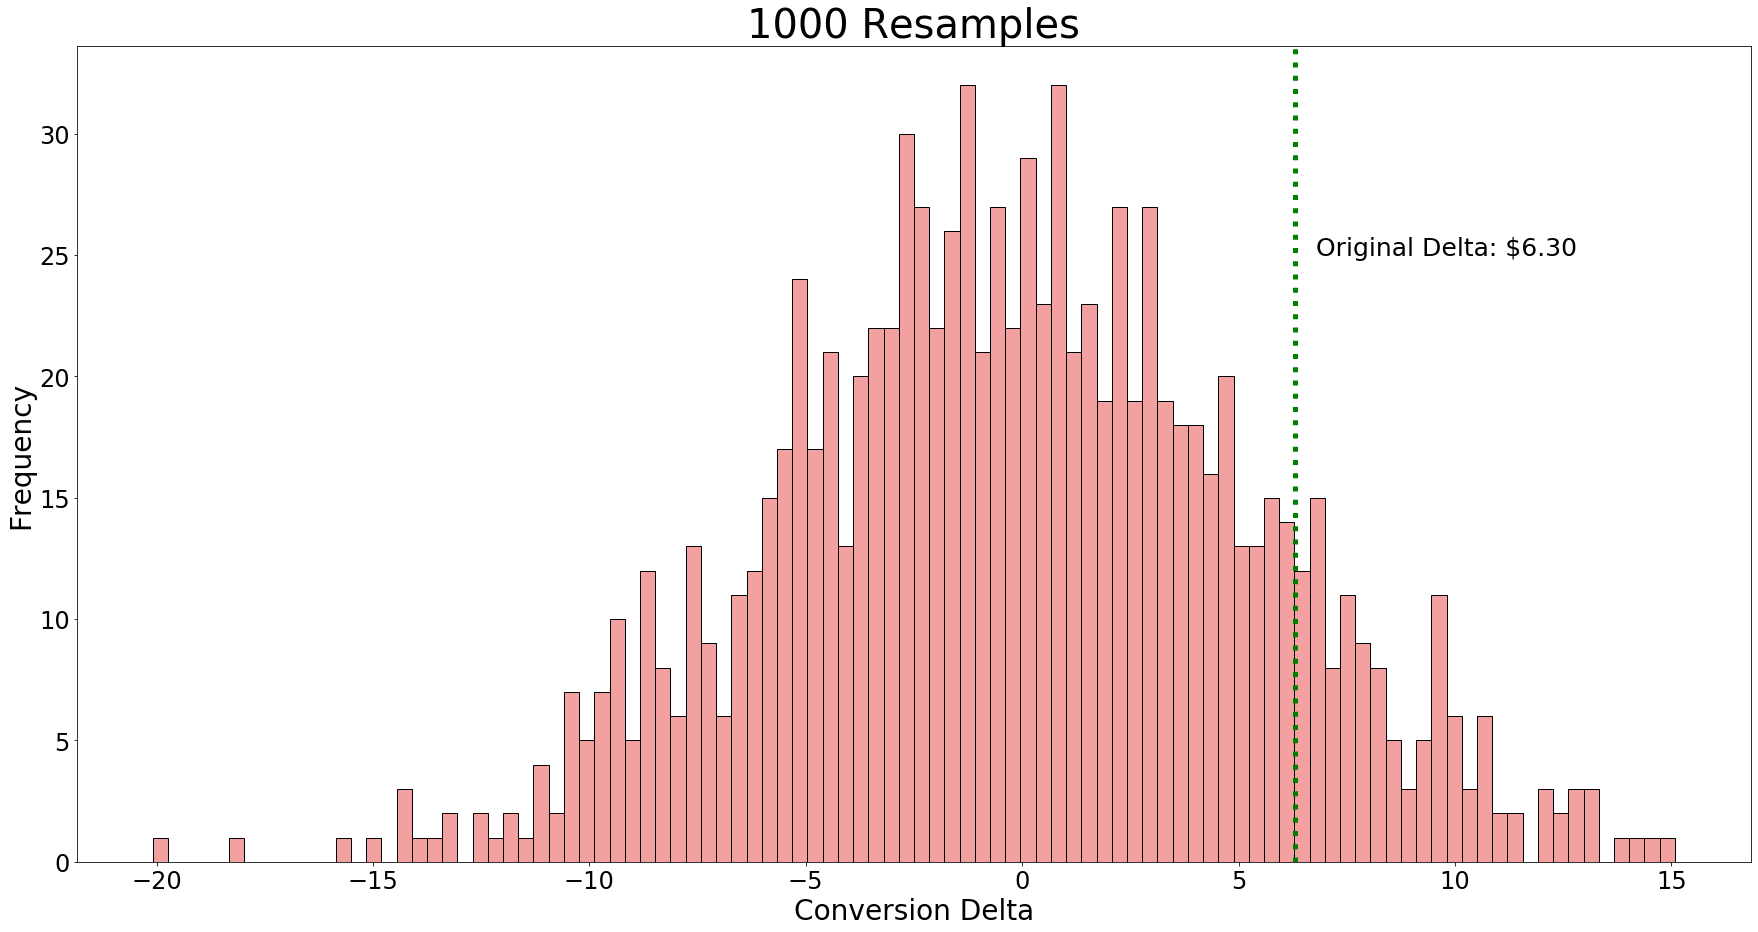

In [318]:
plt.figure(figsize=(30,15))
plt.title('{} Resamples'.format(resamples), size = 40)
plt.axvline(6.30, color='green', linestyle=':', lw = 5)
plt.xlabel('Conversion Delta', size = 28)
plt.ylabel('Frequency', size = 28)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 24)
plt.text(6.80,25,'Original Delta: $6.30', horizontalalignment='left', fontsize = 25)
sns.histplot(b_hist, bins = 100, color = 'lightcoral')
plt.savefig('distribution.png', dpi=25)

In [322]:
results = pd.DataFrame(b_hist.value_counts().sort_index(ascending = False)).reset_index() # $6.30

In [331]:
results.head()

,index,0
0,15.08,1
1,14.41,1
2,14.22,1
3,13.74,1
4,13.28,1


In [330]:
results.iloc[:113,1].sum() # iloc 113 row = > $6.30

121